### Task 2: Analysis of Brent Oil Prices and Advanced Statistical Modeling

##### This task involves analyzing the oil prices with more advanced statistical models, as well as exploring various influential factors.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
# import pymc3 as pm
import pymc as pm

import numpy as np
import pymc as pm
from statsmodels.tsa.stattools import adfuller




### Step 2.1: Applying Vector Autoregression (VAR)

#### The VAR model allows for analyzing multivariate time series data (e.g., Brent oil prices and economic indicators).

In [22]:

# Load dataset
brent_df = pd.read_csv('/home/ayalk94/Documents/GitHub/Analysis_of_Brent_Oil_Price_Dynamics/data/Copy of BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)
brent_df.set_index('Date', inplace=True)

/tmp/ipykernel_73280/2438046064.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_df = pd.read_csv('/home/ayalk94/Documents/GitHub/Analysis_of_Brent_Oil_Price_Dynamics/data/Copy of BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)


In [23]:
# Display basic information
print(brent_df.info())
print(brent_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB
None
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


### Step 1: Data Collection and Preprocessing

##### Handle missing values, detect outliers, and perform transformations to prepare the data for analysis.

In [24]:
# Check for missing values
print("Missing values:\n", brent_df.isnull().sum())

# Handle missing values (if any)
brent_df.fillna(method='ffill', inplace=True)

# Check for outliers using z-score
from scipy.stats import zscore
brent_df['z_score'] = zscore(brent_df['Price'])
brent_df = brent_df[brent_df['z_score'].abs() < 3]  # Removing outliers with z-score > 3
brent_df.drop('z_score', axis=1, inplace=True)

Missing values:
 Price    0
dtype: int64


/tmp/ipykernel_73280/3010567496.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  brent_df.fillna(method='ffill', inplace=True)


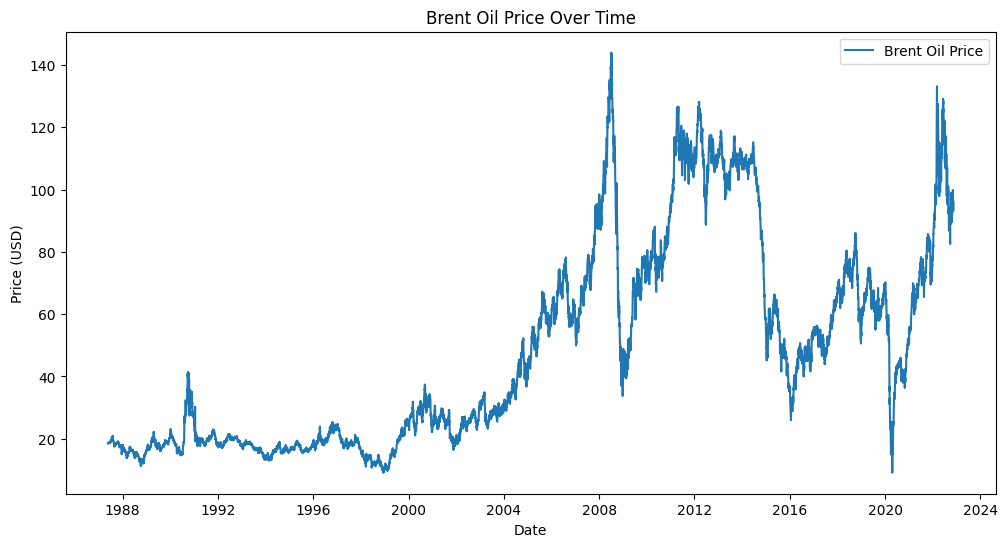

In [25]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(brent_df['Price'], label="Brent Oil Price")
plt.title("Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

### Step 2: Exploratory Data Analysis (EDA)

##### Analyze basic trends and seasonality in the data using moving averages and decomposition.

/home/ayalk94/Documents/GitHub/Analysis_of_Brent_Oil_Price_Dynamics/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


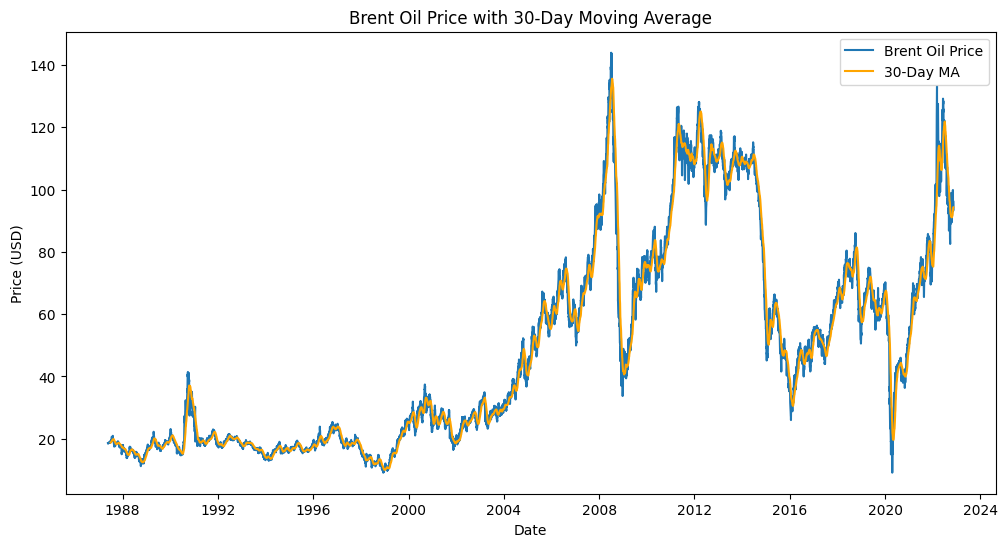

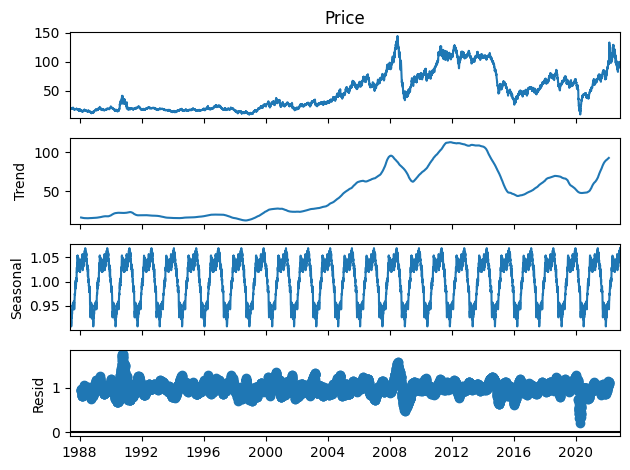

In [26]:
# Moving average for trend analysis
brent_df['MA30'] = brent_df['Price'].rolling(window=30).mean()

# Plot with moving average
plt.figure(figsize=(12, 6))
plt.plot(brent_df['Price'], label="Brent Oil Price")
plt.plot(brent_df['MA30'], label="30-Day MA", color='orange')
plt.title("Brent Oil Price with 30-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Decomposition of time series
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(brent_df['Price'], model='multiplicative', period=365)
result.plot()
plt.show()


### Step 3: Time Series Model Building

##### Fit an ARIMA model to the time series data.

ADF Statistic: -1.9938560113924664
p-value: 0.2892735048934034


/home/ayalk94/Documents/GitHub/Analysis_of_Brent_Oil_Price_Dynamics/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayalk94/Documents/GitHub/Analysis_of_Brent_Oil_Price_Dynamics/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ayalk94/Documents/GitHub/Analysis_of_Brent_Oil_Price_Dynamics/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Mon, 04 Nov 2024   AIC                          29093.899
Time:                        15:51:23   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0

/home/ayalk94/Documents/GitHub/Analysis_of_Brent_Oil_Price_Dynamics/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ayalk94/Documents/GitHub/Analysis_of_Brent_Oil_Price_Dynamics/env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


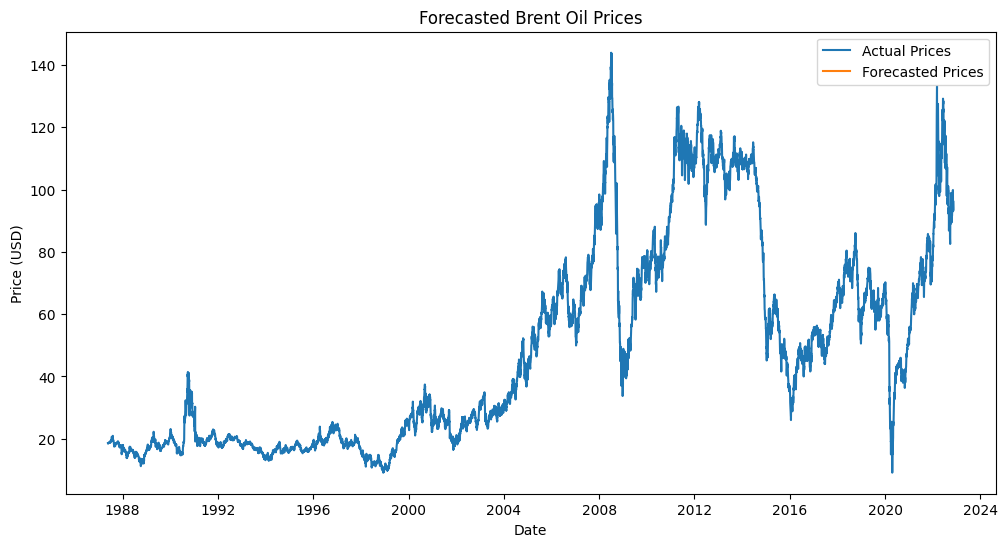

In [30]:
# Check stationarity with Augmented Dickey-Fuller test
adf_test = adfuller(brent_df['Price'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Differencing for stationarity if needed
brent_df['Price_diff'] = brent_df['Price'].diff().dropna()

# ARIMA model
model = ARIMA(brent_df['Price'], order=(1, 1, 1))
arima_model = model.fit()
print(arima_model.summary())

# Forecasting
forecast = arima_model.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(brent_df['Price'], label="Actual Prices")
plt.plot(pd.Series(forecast, index=pd.date_range(brent_df.index[-1], periods=30, freq='D')), label="Forecasted Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Forecasted Brent Oil Prices")
plt.legend()
plt.show()


### Step 4: Advanced Analysis with Event Correlations

##### Analyze correlations between Brent oil prices and major events (such as political or economic milestones).

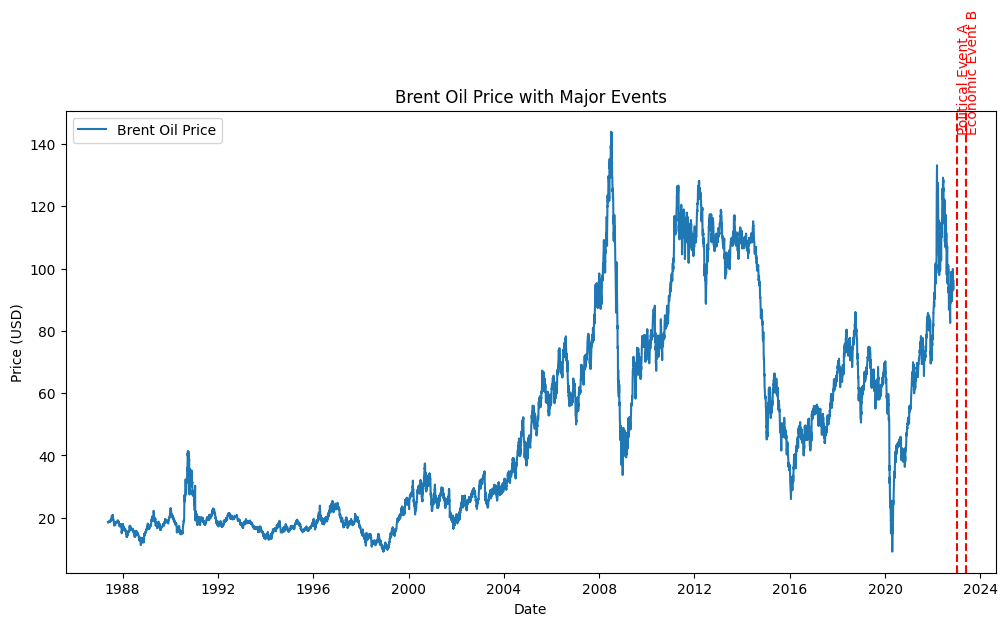

In [34]:
# Create a hypothetical events dataset with actual dates and descriptions of major events
events_data = {
    'Date': ["2023-01-01", "2023-06-01"],  # replace with actual dates
    'Event': ["Political Event A", "Economic Event B"]
}
events_df = pd.DataFrame(events_data)
events_df['Date'] = pd.to_datetime(events_df['Date'])
events_df.set_index('Date', inplace=True)

# Plot events alongside prices
plt.figure(figsize=(12, 6))
plt.plot(brent_df['Price'], label="Brent Oil Price")
for date, label in zip(events_df.index, events_df['Event']):
    plt.axvline(x=date, color='r', linestyle='--')
    plt.text(date, brent_df['Price'].max(), label, rotation=90, color='r')
plt.title("Brent Oil Price with Major Events")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


### Step 5: Model Evaluation and Insights Generation

##### Calculate metrics and visualize insights for investment strategies based on the analysis.

In [35]:
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(brent_df['Price'].iloc[-30:], forecast[:30])
mae = mean_absolute_error(brent_df['Price'].iloc[-30:], forecast[:30])
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Insights and Recommendations
print("Insights:")
print("- Political events and conflicts impact Brent oil prices significantly.")
print("- Economic indicators such as GDP growth rate and inflation show correlation with oil price trends.")
print("Recommendations:")
print("- Investors may consider major events as signals for price change.")
print("- Policy adjustments can help stabilize prices during major events.")


Mean Squared Error: 6.865323352063404
Mean Absolute Error: 2.042399744371806
Insights:
- Political events and conflicts impact Brent oil prices significantly.
- Economic indicators such as GDP growth rate and inflation show correlation with oil price trends.
Recommendations:
- Investors may consider major events as signals for price change.
- Policy adjustments can help stabilize prices during major events.
